In [1]:
%matplotlib inline

In [11]:
import random


CHILD_ON_LEFT = True
CHILD_ON_RIGHT = False


class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.data = val
        self.left_count = 0

    def __repr__(self):
        return '<{data}>'.format(data=self.data)


def insert(root, node):
    if root is None:
        return node

    else:
        if root.data > node.data:
            root.left_count += 1
            if root.l_child is None:
                root.l_child = node
            else:
                insert(root.l_child, node)
        else:
            if root.r_child is None:
                root.r_child = node
            else:
                insert(root.r_child, node)

    return root


def search(root, value):
    if root is None:
        return None

    if root.data == value:
        return root

    if root.data > value:
        if root.l_child is not None:
            return search(root.l_child, value)

        else:
            return None

    # root.data < value
    if root.r_child is not None:
        return search(root.r_child, value)

    else:
        return None


def find_parent(root, node):
    if root is None or root == node:
        return None, None

    if node == root.l_child:
        return root, CHILD_ON_LEFT

    if node == root.r_child:
        return root, CHILD_ON_RIGHT


    if root.data > node.data:
        if root.l_child is not None:
            return find_parent(root.l_child, node)

        else:
            return None, None

    # root.data < value
    if root.r_child is not None:
        return find_parent(root.r_child, node)

    else:
        return None, None


def set_parent_new_child(parent, side, new_child):
    if CHILD_ON_RIGHT == side:
        parent.r_child = new_child
    else:
        parent.l_child = new_child


def find_successor(node):
    current = node.r_child
    if not current:
        return None, None

    parent = node
    while current.l_child is not None:
        parent = current
        current = current.l_child

    return current, parent


def delete(root, node):
    result = search(root, node.data)

    if result != node:  # node not in the tree
        raise ValueError("Node not found in the tree, assuming unique values.")

    parent, side = find_parent(root, node)
    no_l_child = node.l_child is None
    no_r_child = node.r_child is None

    if not parent:  # parent not found
        if node != root:
            raise ValueError("Failed to find parent for a non-root node in the tree. Aborting...")

        if no_l_child:
            return node.r_child

        elif not no_l_child and no_r_child:
            return node.l_child

        successor, successor_parent = find_successor(node)
        successor.l_child = node.l_child

        if successor != node.r_child:
            successor_parent.l_child = successor.r_child
            successor.r_child = node.r_child

        return successor

    else:  # parent found
        if no_l_child:
            set_parent_new_child(parent, side, node.r_child)

        elif not no_l_child and no_r_child:
            set_parent_new_child(parent, side, node.l_child)

        else:
            successor, successor_parent = find_successor(node)
            successor.l_child = node.l_child
            set_parent_new_child(parent, side, successor)

            if successor != node.r_child:
                successor_parent.l_child = successor.r_child
                successor.r_child = node.r_child

    return root


def in_order_print(root):
    if root is None:
        return

    if root.l_child:
        in_order_print(root.l_child)

    print root.data, '-',

    if root.r_child:
        in_order_print(root.r_child)


def print_tree(root, depth=0, is_right=None):
    if root is None:
        return

    if depth > 10:
        raise ValueError("Unable to comply, building in progress")

    if root.r_child:
        print_tree(root.r_child, depth + 1, CHILD_ON_RIGHT)

    if is_right is None:
        symbol = '--'
    elif is_right == CHILD_ON_RIGHT:
        symbol = '/'
    else:
        symbol = '\\'

    print '   ' * depth + ' {symbol} {data}({left})'.format(symbol=symbol, data=root.data, left=root.left_count)

    if root.l_child:
        print_tree(root.l_child, depth + 1, CHILD_ON_LEFT)


def print_tree_plus(root):
    print_tree(root)
    # in_order_print(root)
    print
    print '=' * 20


def find_duplicates(root):
    queue = [root]

    while queue:
        current = queue.pop()
        successor = find_successor(current)[0]
        if successor is not None and current.data == successor.data:
            return True

        if current.l_child:
            queue.append(current.l_child)

        if current.r_child:
            queue.append(current.r_child)

    return False


g_current = None


def integrity(root):
    global g_current

    if root is None:
        return

    if root.l_child:
        integrity(root.l_child)

    if root.data < g_current:
        print root.data
        return False

    g_current = root.data

    if root.r_child:
        integrity(root.r_child)

    return True


def main():
    numbers = range(10)
    random.shuffle(numbers)
    root = None

    for n in numbers:
        print 'Inserting ', n
        root = insert(root, Node(n))
        print_tree_plus(root)

    for n in numbers:
        if search(root, n) is None:
            print n

    for n in range(11, 20):
        if search(root, n) is not None:
            print n

    random.shuffle(numbers)
    for n in numbers:
        print 'Deleting ', n
        root = delete(root, search(root, n))
        print_tree_plus(root)


g_counter = 0

def in_order_walk(root):
    global g_counter
    if root.l_child is not None:
        for node in in_order_walk(root.l_child):
            yield node
            g_counter += 1

    yield root.data
    g_counter += 1

    if root.r_child is not None:
        for node in in_order_walk(root.r_child):
            yield node
            g_counter += 1


def duplicate(root):
    last = None
    for curr in in_order_walk(root):
        if curr == last:
            return True
        last = curr
    return False


def valid(root):
    last = None
    for curr in in_order_walk(root):
        if curr < last:
            return False
        last = curr
    return True


def test_valid_behavior():
    nums = range(100)
    root = None
    random.shuffle(nums)

    for n in nums:
        root = insert(root, Node(n))

    print valid(root)
    print g_counter


def average_depth(root):
    queue = [(root, 1)]
    total_depth = 0.0
    count = 0

    while queue:
        node, depth = queue.pop()

        total_depth += depth
        count += 1

        if node.l_child:
            queue.append((node.l_child, depth + 1))

        if node.r_child:
            queue.append((node.r_child, depth + 1))

    return total_depth / count


def max_height(root):
    queue = [(root, 1)]
    height = 0
    max_height_nodes = []

    while queue:
        node, depth = queue.pop()

        # can optimize as if there are children, this can't be the max depth, but whatever
        if depth > height:
            height = depth
            max_height_nodes = [node]
        elif depth == height:
            max_height_nodes.append(node)

        if node.l_child:
            queue.append((node.l_child, depth + 1))

        if node.r_child:
            queue.append((node.r_child, depth + 1))

    return height, max_height_nodes


def select(root, k):
    node = root
    count = node.left_count

    while count != k:
        if count < k:
            k -= (count + 1)
            node = node.r_child

        else:  # count > k
            node = node.l_child

        if node is None:
            raise ValueError("Encountered None node, expected not to...")

        count = node.left_count

    return node


def rank(root, value):
    node = root
    data = node.data
    total_rank = 0

    while data != value:
        if data < value:
            total_rank += node.left_count + 1
            node = node.r_child

        else:  # data > value
            node = node.l_child

        if node is None:
            raise ValueError("Encountered None node, expected not to...")

        data = node.data

    return total_rank + node.left_count


def test_select_and_rank():
    nums = range(1000)
    root = None
    random.shuffle(nums)
    nums = nums[:500]

    for n in nums:
        root = insert(root, Node(n))

    # print_tree_plus(root)

    for k in xrange(500):
        if k != rank(root, select(root, k).data):
            print k

if __name__ == '__main__':
    test_select_and_rank()



100 77.1 7.71
200 86.775 8.6775
500 108.858 10.8858
1000 119.848 11.9848
2000 133.2235 13.32235
5000 153.4054 15.34054
10000 170.0495 17.00495


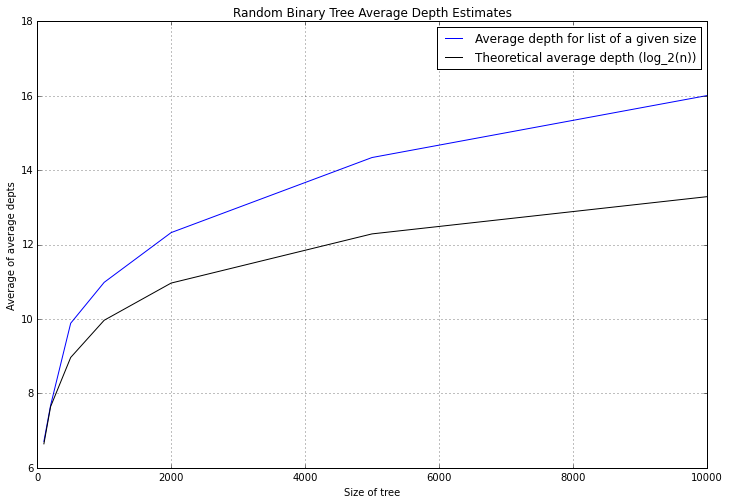

In [13]:
import numpy
import matplotlib.pyplot as plt

N_VALUES = (100, 200, 500, 1000, 2000, 5000, 10000)
REPETITIONS_PER_SIZE = 10


def generate_average_depth(n, reps):
    numbers = range(n)
    result = 0
    
    for _ in xrange(reps):
        numbers_clone = numbers[:]
        random.shuffle(numbers_clone)
        
        root = Node(numbers_clone[0])
        [insert(root, Node(i)) for i in numbers_clone[1:]]
        
        result += average_depth(root)
    
    print n, result, float(result) / reps
    return float(result) / reps


def graph_average_depth(n_values=N_VALUES, repetitions=REPETITIONS_PER_SIZE):
    """
    Graphs consecutive drops of pi as generated by the function
    consecutive_buffons_needle_pi_approximation
    for the given values of n, repeated number_of_simulations times
    """
    plt.figure(figsize=(12, 8), dpi=400)
    
    average_depths = [generate_average_depth(n, repetitions) - 1 for n in n_values]

    plt.plot(n_values, average_depths, label="Average depth for list of a given size")

    plt.plot(n_values, numpy.log2(n_values), color='black', label="Theoretical average depth (log_2(n))")
    
    plt.grid(True)
    plt.title("Random Binary Tree Average Depth Estimates")
    plt.xlabel("Size of tree")
    plt.ylabel("Average of average depts")
    plt.legend()
    
    plt.show()
        

if __name__ == '__main__':
    graph_average_depth()
